# EDA (Exploratory Data Analysis)

In [216]:
# importing data
import pandas as pd
import numpy as np

df = pd.read_csv("medical_examination.csv")
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [217]:
df.shape

(70000, 13)

In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [219]:
# Normalize data by making 0 always good and 1 always bad. If the value of 'cholesterol' or 'gluc' is 1, make the value 0. If the value is more than 1, make the value 1.

In [220]:
df["cholesterol"] = np.where(df["cholesterol"] == 1, 0, 1)
df["gluc"] = np.where(df["gluc"] == 1, 0, 1)
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0


In [221]:
# Add 'overweight' column

df['overweight'] = np.where((df["weight"]/((df["height"]/100)**2)) > 25, 1, 0)
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


In [222]:
df["overweight"].value_counts()

1    43546
0    26454
Name: overweight, dtype: int64

In [223]:
df_reduced = df[["active","alco","cholesterol","gluc","overweight","smoke","cardio"]].melt(id_vars="cardio")
df_reduced

,cardio,variable,value
0,0,active,1
1,1,active,1
2,1,active,0
3,1,active,1
4,0,active,0
...,...,...,...
419995,0,smoke,1
419996,1,smoke,0
419997,1,smoke,0
419998,1,smoke,0


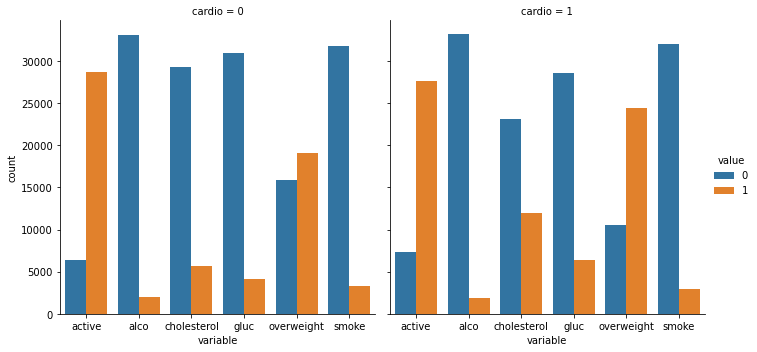

In [230]:
#visualize
import matplotlib.pyplot as plt
import seaborn as sns

catplot = sns.catplot(x="variable", hue="value", col="cardio", data=df_reduced, kind="count");
fig = catplot.fig
fig.savefig("catplot.png")
catplot

In [231]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0


### Cleaning the Incorect Data

In [232]:
# "ap_hi" should be higher than "ap_lo"

In [233]:
df[df["ap_lo"]>df["ap_hi"]]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
228,314,17489,2,183,98.0,160,1100,0,1,1,0,1,1,1
241,334,21932,2,157,60.0,160,1000,1,0,0,0,0,1,0
260,357,18217,1,150,83.0,140,800,0,0,0,0,1,1,1
329,458,23407,1,176,63.0,160,1000,1,1,0,0,0,1,0
345,482,18704,1,154,81.0,140,1000,1,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69771,99659,23330,1,167,81.0,160,1000,0,0,0,0,1,1,1
69872,99798,21808,1,152,56.0,160,1000,0,0,0,0,1,1,0
69878,99807,21239,2,168,95.0,160,1000,0,0,0,0,1,1,1
69885,99816,22417,2,166,78.0,170,1000,0,0,0,0,0,0,1


In [234]:
## 1234 rows have incorrect data

In [235]:
df = df[df["ap_hi"]>df["ap_lo"]]
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


In [236]:
# if "height" is less than 2.5th percentile delete the related row

In [237]:
df[df["height"]<df["height"].quantile(0.025)]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
65,87,21752,1,148,80.0,130,90,0,0,0,0,1,1,1
165,223,21135,1,148,53.0,120,80,0,0,0,0,1,1,0
183,250,23312,1,148,50.0,120,80,1,0,0,0,1,0,0
224,309,21800,2,76,55.0,120,80,0,0,0,0,1,0,1
234,324,21377,1,149,60.0,120,80,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69768,99656,19540,1,147,68.0,120,80,0,0,0,0,1,0,1
69784,99673,17541,1,141,44.0,100,70,0,0,0,0,1,0,0
69865,99785,23646,1,149,49.0,115,75,0,0,0,0,1,0,0
69934,99901,15843,1,143,70.0,120,90,1,0,0,0,1,1,1


In [238]:
## 1506 "height" values are less than the 2.5th percentile

In [239]:
df = df[df["height"]>=df["height"].quantile(0.025)]
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


In [240]:
# if "height" is greater than 97.5th percentile delete the related row

In [241]:
df[df["height"] > df["height"].quantile(0.975)]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
14,23,14532,2,181,95.0,130,90,0,0,1,1,1,0,1
62,81,20330,2,187,115.0,130,90,0,0,0,1,1,0,1
76,105,20397,2,188,105.0,120,80,0,0,0,0,1,1,1
94,127,15946,2,185,88.0,133,89,1,1,0,0,1,0,1
103,138,18128,2,183,95.0,125,80,0,1,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69887,99820,15241,2,183,84.0,110,80,0,0,0,0,1,1,1
69913,99862,18748,2,186,101.0,110,80,1,0,0,0,1,0,1
69975,99963,21264,2,182,100.0,120,80,0,0,0,0,1,1,1
69981,99972,17500,2,182,110.0,130,90,1,1,0,0,1,1,1


In [242]:
## 1401 "height" values are more than the 97.5th percentile

In [243]:
df = df[df["height"] <= df["height"].quantile(0.975)]
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,99992,21074,1,165,80.0,150,80,0,0,0,0,1,1,1
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


In [244]:
# if "weight" is less than 2.5th percentile delete the related row

In [245]:
df[df["weight"]<df["weight"].quantile(0.025)]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
23,33,23376,2,156,45.0,110,60,0,0,0,0,1,0,0
44,59,19764,1,154,50.0,170,80,1,0,0,0,1,1,0
80,109,16591,1,159,49.0,120,70,0,0,0,0,1,0,0
107,142,14499,2,164,48.0,110,70,0,1,1,1,1,1,0
109,144,16066,1,157,51.0,100,70,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69908,99856,14823,1,152,42.0,120,80,0,0,0,0,1,0,0
69912,99861,16002,1,155,48.0,90,70,0,0,0,0,1,0,0
69919,99871,17312,1,159,45.0,110,70,1,1,0,0,1,0,0
69961,99948,16598,1,161,50.0,110,75,0,0,0,0,1,0,0


In [246]:
## 1475 "weight" values are less than the 2.5th percentile

In [247]:
df = df[df["weight"] >= df["weight"].quantile(0.025)]
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,99992,21074,1,165,80.0,150,80,0,0,0,0,1,1,1
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


In [248]:
# if "weight" is greater than 97.5th percentile delete the related row

In [249]:
df[df["weight"] > df["weight"].quantile(0.975)]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
15,24,16782,2,172,112.0,120,80,0,0,0,0,0,1,1
46,61,18207,1,162,107.0,150,90,1,0,0,0,1,1,1
83,114,19570,1,152,110.0,160,90,0,0,0,0,1,1,1
196,267,22675,1,176,108.0,140,90,0,0,0,0,0,0,1
267,366,17460,1,165,115.0,150,100,0,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69668,99507,14925,1,170,111.0,160,90,1,0,0,1,0,1,1
69699,99553,23183,2,178,113.0,130,90,1,1,1,0,1,1,1
69946,99925,21333,1,164,115.0,130,80,0,0,0,0,1,1,1
69947,99930,23305,2,172,113.0,110,80,0,0,0,0,0,1,1


In [250]:
# 1496 "weight" values are more than the 97.5th percentile

In [251]:
df = df[df["weight"] <= df["weight"].quantile(0.975)]
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,99991,19699,1,172,70.0,130,90,0,0,0,0,1,1,0
69994,99992,21074,1,165,80.0,150,80,0,0,0,0,1,1,1
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


### Examine the Correlation

In [252]:
df_corr = df.corr()
df.corr()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,1.000000,0.002597,0.003823,0.000255,0.000191,0.003486,0.000463,0.003857,0.002470,-0.002409,-0.001043,0.005855,0.003788,-0.000755
age,0.002597,1.000000,-0.018242,-0.077383,0.069774,0.018479,0.152841,0.129571,0.087272,-0.044216,-0.026963,-0.011520,0.240017,0.089303
gender,0.003823,-0.018242,1.000000,0.504702,0.130066,0.004945,0.059460,-0.037657,-0.021169,0.337694,0.169185,0.007746,0.001705,-0.055164
height,0.000255,-0.077383,0.504702,1.000000,0.248805,0.004306,0.015295,-0.064461,-0.031398,0.187404,0.089267,-0.004979,-0.025706,-0.156169
weight,0.000191,0.069774,0.130066,0.248805,1.000000,0.026536,0.223721,0.132719,0.104499,0.055822,0.058299,-0.012026,0.166853,0.655772
ap_hi,0.003486,0.018479,0.004945,0.004306,0.026536,1.000000,0.072268,0.022604,0.011003,-0.001979,0.000606,-0.000167,0.050325,0.016903
ap_lo,0.000463,0.152841,0.059460,0.015295,0.223721,0.072268,1.000000,0.148724,0.073935,0.023008,0.031848,0.002247,0.326106,0.169548
cholesterol,0.003857,0.129571,-0.037657,-0.064461,0.132719,0.022604,0.148724,1.000000,0.383599,0.012794,0.037586,0.002786,0.202269,0.126778
gluc,0.002470,0.087272,-0.021169,-0.031398,0.104499,0.011003,0.073935,0.383599,1.000000,-0.004205,0.013615,-0.009643,0.088274,0.086855
smoke,-0.002409,-0.044216,0.337694,0.187404,0.055822,-0.001979,0.023008,0.012794,-0.004205,1.000000,0.341433,0.027194,-0.020600,-0.003977


<AxesSubplot:>

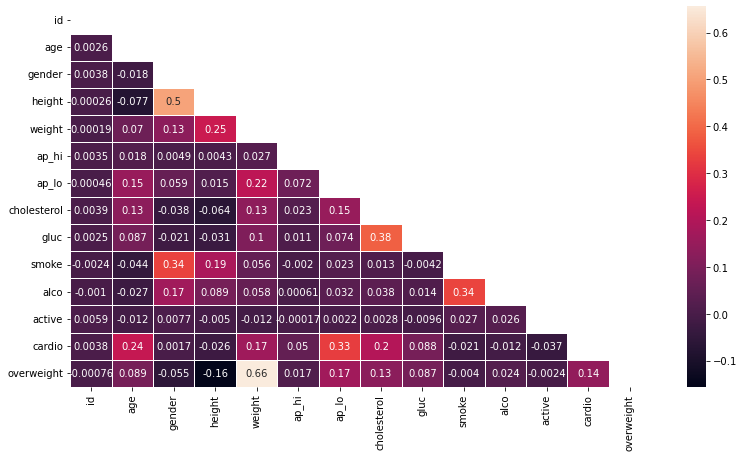

In [253]:
import matplotlib.pyplot as plt
matrix = np.triu(df_corr)

plt.figure(figsize=(13,7))
heatmap = sns.heatmap(df.corr(), linewidths=.5, annot=True, mask=matrix);
plt.savefig("heatmap.png")
heatmap;